In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [124]:
urls = [
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/netflix_titles.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/amazon_prime_titles.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/Bechdel.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/MovieGenre.csv'
]

dfs = []
for i, url in enumerate(urls):
    df_name = f'df_{i+1}'
    globals()[df_name] = pd.read_csv(url, encoding='ISO-8859-9')
    dfs.append(globals()[df_name])

In [125]:
netflix_df = df_1
prime_df = df_2
bechdel_df = df_3
movieposter_df = df=df_4

In [126]:
movieposter_df.head(3)

imdbId                           Imdb Link                    Title  \
0  114709  http://www.imdb.com/title/tt114709         Toy Story (1995)   
1  113497  http://www.imdb.com/title/tt113497           Jumanji (1995)   
2  113228  http://www.imdb.com/title/tt113228  Grumpier Old Men (1995)   

   IMDB Score                       Genre  \
0         8.3  Animation|Adventure|Comedy   
1         6.9     Action|Adventure|Family   
2         6.6              Comedy|Romance   

                                              Poster  
0  https://images-na.ssl-images-amazon.com/images...  
1  https://images-na.ssl-images-amazon.com/images...  
2  https://images-na.ssl-images-amazon.com/images...

In [127]:
def split_title_and_year(title):
    parts = title.rsplit('(', 1)
    film_name = parts[0].strip()
    if len(parts) > 1:
        year = parts[1][:-1]  
    else:
        year = ''  
    return pd.Series([film_name, year], index=['title', 'year'])


movieposter_df[['title', 'year']] = movieposter_df['Title'].apply(split_title_and_year)


movieposter_df.drop('Title', axis=1, inplace=True)


movieposter_df = movieposter_df[['imdbId', 'Imdb Link', 'title', 'year', 'IMDB Score', 'Genre', 'Poster']]

In [128]:
print(movieposter_df.columns)

Index(['imdbId', 'Imdb Link', 'title', 'year', 'IMDB Score', 'Genre',
       'Poster'],
      dtype='object')


In [129]:
num_duplicates = netflix_df.duplicated().sum()
print(num_duplicates)

0


In [130]:
num_duplicates = prime_df.duplicated().sum()
print(num_duplicates)

0


In [131]:
num_duplicates = bechdel_df.duplicated().sum()
print(num_duplicates)

0


In [132]:
num_duplicates = movieposter_df.duplicated().sum()
print(num_duplicates)
movieposter_df.drop_duplicates(subset=['title'], inplace=True)
num_duplicates = movieposter_df.duplicated().sum()
print(num_duplicates)

593
0


C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\1597380130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieposter_df.drop_duplicates(subset=['title'], inplace=True)


In [133]:
merged_df = pd.concat([netflix_df, prime_df]).drop_duplicates(subset=['title'])
merged_df

show_id     type                    title         director  \
0         s1    Movie     Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show            Blood & Water              NaN   
2         s3  TV Show                Ganglands  Julien Leclercq   
3         s4  TV Show    Jailbirds New Orleans              NaN   
4         s5  TV Show             Kota Factory              NaN   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
9663                           Leo Gorcey, Bobby Jordan            NaN   
9664  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...            NaN   
9665  Ray Stevenson, Julian Wadham, Richard Brake, M...            NaN   
9666  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...            NaN   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...            NaN   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
9663                 NaN          1940     7+     60 min   
9664                 NaN          2018    13+  4 Seasons   
9665                 NaN          2008      R     90 min   
9666                 NaN          2021  TV-MA   1 Season   
9667                 NaN          2010      R    103 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
9663                                             Comedy   
9664                                           TV Shows   
9665                                             Action   
9666                                      Drama, Sports   
9667                            Action, Drama, Suspense   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
9663  New York City street principles get an East Si...  
9664  This is Earth, 2100AD - and these are the adve...  
9665  In war-torn Eastern Europe, a world-weary grou...  
9666  The series tells the story of Diego Maradona, ...  
9667  Harry Brown, starring two-time Academy Award w...  

[18086 rows x 12 columns]

In [134]:
merged_bnp_df = pd.merge(merged_df, bechdel_df, on='title', how='inner', suffixes=('_merged', '_bechdel'))
allmerged_df = pd.merge(merged_bnp_df, movieposter_df, on='title', how='inner')

In [135]:
duplicates = allmerged_df[allmerged_df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [136]:
print(allmerged_df.columns)
unwanted_columns = ['show_id', 'date_added','imdbid','id', 'imdbId', 'listed_in', 'description',
       'Unnamed: 0', 'year_x','Imdb Link', 'year_y']
no_unw_col_df = allmerged_df.drop(unwanted_columns, axis=1)
new_column_order = ['type', 'title', 'cast', 'country',
       'release_year', 'rating_merged', 'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster', 'director']
no_unw_col_df = no_unw_col_df.reindex(columns=new_column_order)

print(no_unw_col_df.head(5))
no_unw_col_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating_merged', 'duration', 'listed_in', 'description',
       'Unnamed: 0', 'imdbid', 'id', 'rating_bechdel', 'year_x', 'imdbId',
       'Imdb Link', 'year_y', 'IMDB Score', 'Genre', 'Poster'],
      dtype='object')
      type              title  \
0  TV Show  Dear White People   
1    Movie          Grown Ups   
2    Movie         Dark Skies   
3    Movie               Jaws   
4    Movie             Jaws 2   

                                                cast        country  \
0  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
1  Adam Sandler, Kevin James, Chris Rock, David S...  United States   
2  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...  United States   
3  Roy Scheider, Robert Shaw, Richard Dreyfuss, L...  United States   
4  Roy Scheider, Lorraine Gary, Murray Hamilton, ...  United States   

   release_year rating_merged   duration  rating_bech

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating_merged',
       'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster',
       'director'],
      dtype='object')

In [137]:
print(no_unw_col_df.isnull().sum())

type                0
title               0
cast               17
country           317
release_year        0
rating_merged       3
duration            0
rating_bechdel      0
IMDB Score          0
Genre               0
Poster              0
director           92
dtype: int64


In [138]:
no_unw_col_df.columns

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating_merged',
       'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster',
       'director'],
      dtype='object')

In [139]:
split_cast = no_unw_col_df['cast'].str.split(', ', expand=True)

for i in range(3):
    no_unw_col_df[f'cast{i+1}'] = split_cast[i]

no_unw_col_df.drop(columns=['cast'], inplace=True)

for i in range(3):
    no_unw_col_df.loc[:, f'cast{i+1}'] = no_unw_col_df[f'cast{i+1}'].fillna('')

In [140]:
no_unw_col_df.columns

Index(['type', 'title', 'country', 'release_year', 'rating_merged', 'duration',
       'rating_bechdel', 'IMDB Score', 'Genre', 'Poster', 'director', 'cast1',
       'cast2', 'cast3'],
      dtype='object')

In [141]:
cleaned_df=no_unw_col_df.dropna()
print(cleaned_df.isnull().sum())
cleaned_df.reset_index(drop=True, inplace=True)

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
dtype: int64


In [142]:
cleaned_df.loc[:, 'Genre'] = cleaned_df['Genre'].apply(lambda x: x.split('|')[0] if '|' in x else x)
cleaned_df.loc[:, 'country'] = cleaned_df['country'].apply(lambda x: x.split(',')[0] if x else '')

In [143]:
cleaned_df.head()

type              title        country  release_year rating_merged  \
0  Movie          Grown Ups  United States          2010         PG-13   
1  Movie         Dark Skies  United States          2013         PG-13   
2  Movie               Jaws  United States          1975            PG   
3  Movie             Jaws 2  United States          1978            PG   
4  Movie  Jaws: The Revenge  United States          1987         PG-13   

  duration  rating_bechdel  IMDB Score      Genre  \
0  103 min               3         6.0     Comedy   
1   97 min               2         6.3     Horror   
2  124 min               3         8.0  Adventure   
3  116 min               2         5.7  Adventure   
4   91 min               3         2.9  Adventure   

                                              Poster          director  \
0  https://images-na.ssl-images-amazon.com/images...      Dennis Dugan   
1  https://images-na.ssl-images-amazon.com/images...     Scott Stewart   
2  https://images-na.ssl-images-amazon.com/images...  Steven Spielberg   
3  https://images-na.ssl-images-amazon.com/images...    Jeannot Szwarc   
4  https://images-na.ssl-images-amazon.com/images...    Joseph Sargent   

           cast1          cast2              cast3  
0   Adam Sandler    Kevin James         Chris Rock  
1   Keri Russell  Josh Hamilton       J.K. Simmons  
2   Roy Scheider    Robert Shaw   Richard Dreyfuss  
3   Roy Scheider  Lorraine Gary    Murray Hamilton  
4  Lorraine Gary    Lance Guest  Mario Van Peebles

In [144]:
cleaned_df['duration'] = cleaned_df['duration'].astype(str)
cleaned_df['duration'] = cleaned_df['duration'].str.extract('(\\d+)').astype(int)
cleaned_df['duration']

C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\1401832081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['duration'] = cleaned_df['duration'].astype(str)
C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\1401832081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['duration'] = cleaned_df['duration'].str.extract('(\\d+)').astype(int)


0      103
1       97
2      124
3      116
4       91
      ... 
666    132
667    102
668    124
669     89
670    103
Name: duration, Length: 671, dtype: int32

In [145]:
duplicates = cleaned_df.duplicated()
print(duplicates)
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
666    False
667    False
668    False
669    False
670    False
Length: 671, dtype: bool
Number of duplicates: 18


In [146]:
cleaned_df = cleaned_df.drop_duplicates()

In [147]:
null_values = cleaned_df.isnull().sum()
print(null_values)
num_null = null_values.sum()
print("Number of null values :", num_null)

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
dtype: int64
Number of null values : 0


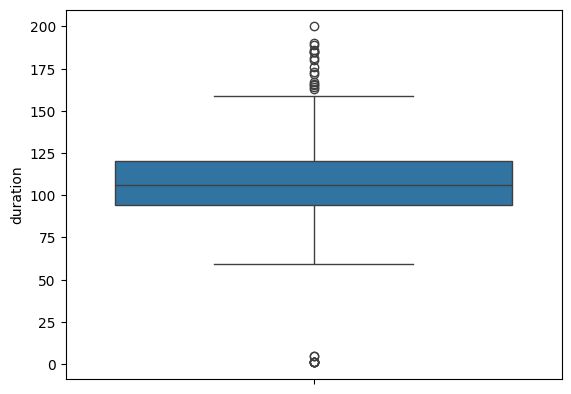

In [148]:
box=sns.boxplot(cleaned_df['duration'])
plt.show()

In [149]:
outliers = [f.get_ydata()[0] for f in box.lines if f.get_linestyle() == 'None']

outlier_indices = []
for val in outliers:
    indices = cleaned_df[cleaned_df['duration'] == val].index.tolist()
    outlier_indices.extend(indices)


print("Outlier values:", outliers)
print("Indices of outliers in the original data:", outlier_indices)

Outlier values: [1.0]
Indices of outliers in the original data: [136, 169, 221, 229, 246, 247]


In [150]:
cleaned_df = cleaned_df.drop([136, 169, 221, 229, 246, 247])

In [151]:
no_outlier_df=cleaned_df.reset_index(drop=True)
no_outlier_df

type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_bechdel  IMDB Score      Genre  \
0         103               3         6.0     Comedy   
1          97               2         6.3     Horror   
2         124               3         8.0  Adventure   
3         116               2         5.7  Adventure   
4          91               3         2.9  Adventure   
..        ...             ...         ...        ...   
642       132               3         8.2     Action   
643       102               3         6.4     Comedy   
644       124               3         7.0  Adventure   
645        89               3         5.5     Comedy   
646       103               3         7.8     Comedy   

                                                Poster  \
0    https://images-na.ssl-images-amazon.com/images...   
1    https://images-na.ssl-images-amazon.com/images...   
2    https://images-na.ssl-images-amazon.com/images...   
3    https://images-na.ssl-images-amazon.com/images...   
4    https://images-na.ssl-images-amazon.com/images...   
..                                                 ...   
642  https://images-na.ssl-images-amazon.com/images...   
643  https://images-na.ssl-images-amazon.com/images...   
644  https://images-na.ssl-images-amazon.com/images...   
645  https://images-na.ssl-images-amazon.com/images...   
646  https://images-na.ssl-images-amazon.com/images...   

                           director            cast1               cast2  \
0                      Dennis Dugan     Adam Sandler         Kevin James   
1                     Scott Stewart     Keri Russell       Josh Hamilton   
2                  Steven Spielberg     Roy Scheider         Robert Shaw   
3                    Jeannot Szwarc     Roy Scheider       Lorraine Gary   
4                    Joseph Sargent    Lorraine Gary         Lance Guest   
..                              ...              ...                 ...   
642                  John McTiernan     Bruce Willis        Alan Rickman   
643                      Chris Rock       Chris Rock      Rosario Dawson   
644                    Ridley Scott     Noomi Rapace  Michael Fassbender   
645                     Gary Winick      Kate Hudson       Anne Hathaway   
646  Jonathan Dayton, Valerie Faris  Abigail Breslin        Greg Kinnear   

                 cast3  
0           Chris Rock  
1         J.K. Simmons  
2     Richard Dreyfuss  
3      Murray Hamilton  
4    Mario Van Peebles  
..                 ...  
642     Bonnie Bedelia  
643    Gabrielle Union  
644         Guy Pearce  
645   Kristen Johnston  
646          Paul Dano  

[647 rows x 14 columns]

In [152]:
import requests
from PIL import Image
from io import BytesIO
import pandas as pd


no_outlier_df['Red'] = None
no_outlier_df['Green'] = None
no_outlier_df['Blue'] = None


failed_urls_count = 0


for index, url in enumerate(no_outlier_df['Poster']):
    
    image_url = url

    
    try:
        response = requests.get(image_url)
        if response.status_code == 200:
            
            image = Image.open(BytesIO(response.content))

            
            image_rgb = image.convert("RGB")

            
            width, height = image_rgb.size

            
            pixels = list(image_rgb.getdata())

            
            total_red = 0
            total_green = 0
            total_blue = 0

            
            for pixel in pixels:
                total_red += pixel[0]
                total_green += pixel[1]
                total_blue += pixel[2]

            
            total_pixels = len(pixels)
            total_average = total_red + total_green + total_blue

            normalized_red = (total_red / total_average) * 100
            normalized_green = (total_green / total_average) * 100
            normalized_blue = (total_blue / total_average) * 100

            
            no_outlier_df.at[index, 'Red'] = normalized_red
            no_outlier_df.at[index, 'Green'] = normalized_green
            no_outlier_df.at[index, 'Blue'] = normalized_blue
            
            
            #print(f"Normalized average red: {normalized_red:.2f}")
            #print(f"Normalized average green: {normalized_green:.2f}")
            #print(f"Normalized average blue: {normalized_blue:.2f}")
        else:
            #print(f"Can not reach url: {image_url}")
            failed_urls_count += 1  
    except Exception as e:
        print("error occured:", e)
        failed_urls_count += 1  

print(f"Unreachable url number: {failed_urls_count}")


print(no_outlier_df)


Unreachable url number: 59
      type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_be

In [153]:
no_outlier_df.isnull().sum()

type               0
title              0
country            0
release_year       0
rating_merged      0
duration           0
rating_bechdel     0
IMDB Score         0
Genre              0
Poster             0
director           0
cast1              0
cast2              0
cast3              0
Red               59
Green             59
Blue              59
dtype: int64

In [154]:
no_outlier_null_df = no_outlier_df.dropna()

In [155]:
no_outlier_null_df.isnull().sum()

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
Red               0
Green             0
Blue              0
dtype: int64

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

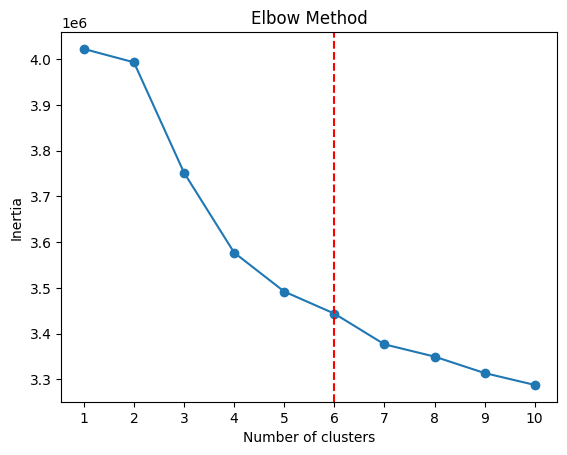

In [156]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


image_urls = no_outlier_null_df["Poster"]
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
url_to_image = {}

def load_image_from_url(url):
    if url in url_to_image:
        return url_to_image[url]
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        url_to_image[url] = img_array
        
        return img_array
    except (requests.exceptions.RequestException, IOError) as e:
        return None

valid_images = []
valid_urls = []

for url in image_urls:
    img = load_image_from_url(url)
    if img is not None:
        valid_images.append(img)
        valid_urls.append(url)


features = [model.predict(img_array).flatten() for img_array in valid_images]


inertia_values = []


for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia_values, marker='o')
plt.axvline(x=6, color='r', linestyle='--', label='k = 6')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

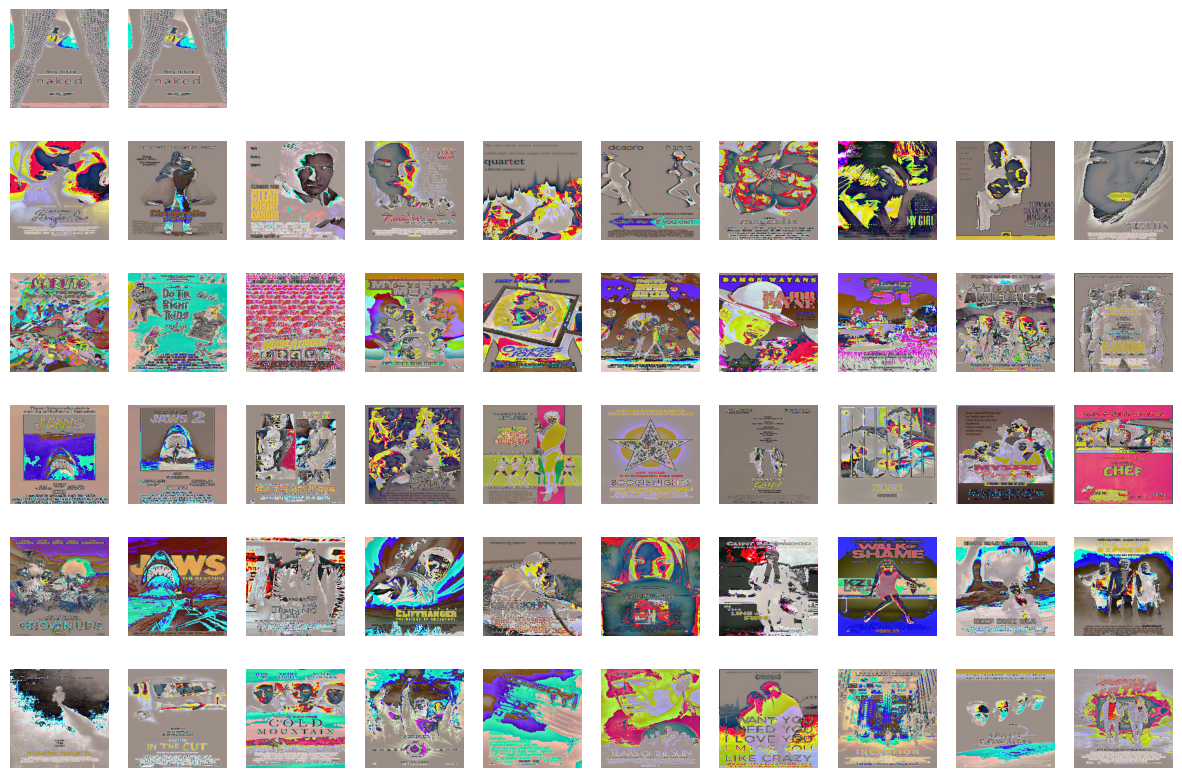

Cluster 1 (Number of images: 2):
Cluster 2 (Number of images: 134):
Cluster 3 (Number of images: 98):
Cluster 4 (Number of images: 95):
Cluster 5 (Number of images: 93):
Cluster 6 (Number of images: 166):


In [157]:

n_clusters = 6  
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
kmeans.fit(features)


labels = kmeans.labels_


plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    num_images = len(cluster)
    
    for j, index in enumerate(cluster):
        if j >= 10: 
            break
        img = load_image_from_url(valid_urls[index])
        plt.subplot(n_clusters, 10, i * 10 + j + 1)  
        plt.imshow(np.uint8(img[0]))
        plt.axis('off')

plt.show()


for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    print(f"Cluster {i+1} (Number of images: {len(cluster)}):")
    

In [158]:
cluster_number = 1  
cluster_indices = np.where(labels == cluster_number - 1)[0]  

print(f"URLs of images in Cluster {cluster_number}:")
for index in cluster_indices:
    print(valid_urls[index])

URLs of images in Cluster 1:
https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg
https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg


In [159]:
indices=no_outlier_null_df.index[no_outlier_null_df['Poster']== 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg'].tolist()
print(indices)

[238, 239]


In [160]:
indices_to_drop = [238,239]
no_outlier_null_df=no_outlier_null_df.drop(indices_to_drop)

In [161]:
indices=no_outlier_null_df.index[no_outlier_null_df['Poster']== 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg'].tolist()
print(indices)

[]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

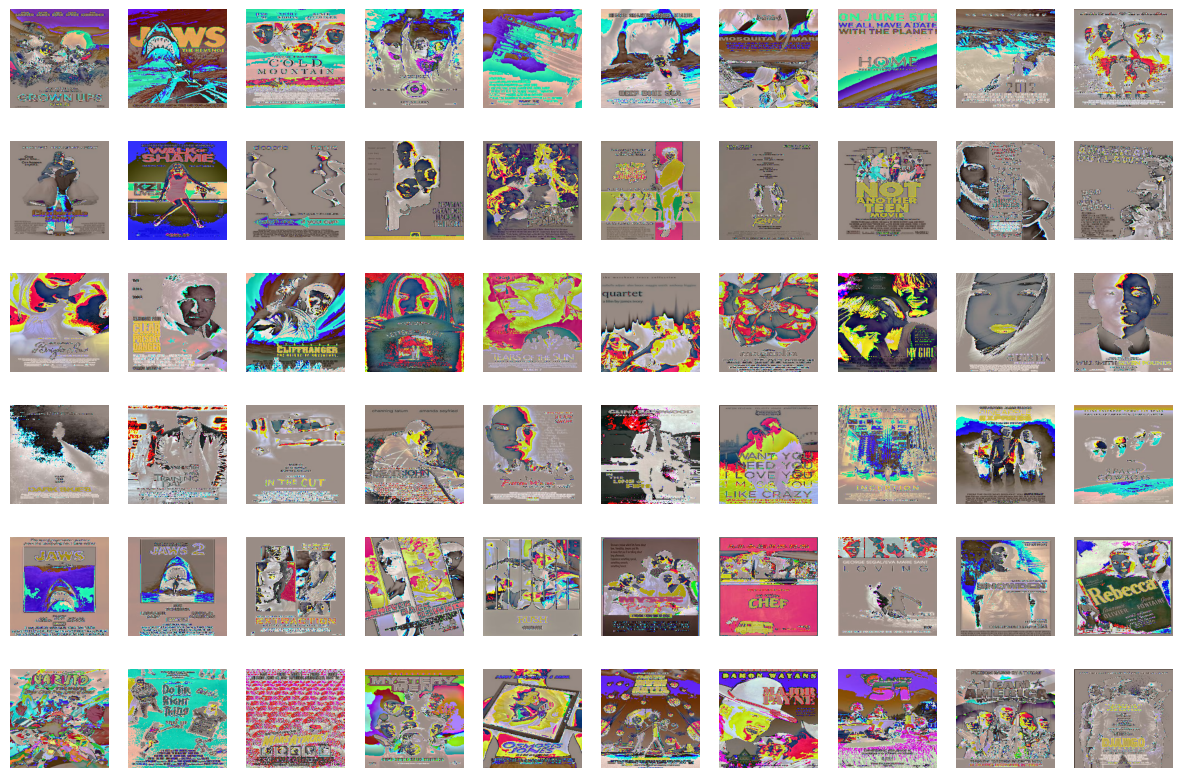

Cluster 1 (Number of images: 74):
Cluster 2 (Number of images: 104):
Cluster 3 (Number of images: 97):
Cluster 4 (Number of images: 147):
Cluster 5 (Number of images: 58):
Cluster 6 (Number of images: 106):


In [162]:
image_urls = no_outlier_null_df["Poster"]
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
url_to_image = {}

def load_image_from_url(url):
    if url in url_to_image:
        return url_to_image[url]
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        url_to_image[url] = img_array
        
        return img_array
    except (requests.exceptions.RequestException, IOError) as e:
        return None

valid_images = []
valid_urls = []
invalid_urls = []

for url in image_urls:
    img = load_image_from_url(url)
    if img is not None:
        valid_images.append(img)
        valid_urls.append(url)
    else:
        invalid_urls.append(url)


features = [model.predict(img_array).flatten() for img_array in valid_images]


valid_urls_set = set(valid_urls)
image_urls_set = set(image_urls)

for invalid_url in invalid_urls:
    if invalid_url in valid_urls_set:
        invalid_index = valid_urls.index(invalid_url)
        del features[invalid_index]
        valid_urls.remove(invalid_url)


n_clusters = 6  
kmeans = KMeans(n_clusters=n_clusters, random_state=42,max_iter=500)
kmeans.fit(features)


labels = kmeans.labels_


no_outlier_null_df['Cluster'] = 9


for i, url in enumerate(valid_urls):
    index = no_outlier_null_df[no_outlier_null_df["Poster"] == url].index[0]
    no_outlier_null_df.at[index, 'Cluster'] = labels[i] + 1  


print(no_outlier_null_df)


plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    num_images = len(cluster)
    
    for j, index in enumerate(cluster):
        if j >= 10:  
            break
        img = load_image_from_url(valid_urls[index])
        plt.subplot(n_clusters, 10, i * 10 + j + 1)  
        plt.imshow(np.uint8(img[0]))
        plt.axis('off')

plt.show()

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    print(f"Cluster {i+1} (Number of images: {len(cluster)}):")

In [163]:
no_outlier_null_df

type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_bechdel  IMDB Score      Genre  \
0         103               3         6.0     Comedy   
1          97               2         6.3     Horror   
2         124               3         8.0  Adventure   
3         116               2         5.7  Adventure   
4          91               3         2.9  Adventure   
..        ...             ...         ...        ...   
642       132               3         8.2     Action   
643       102               3         6.4     Comedy   
644       124               3         7.0  Adventure   
645        89               3         5.5     Comedy   
646       103               3         7.8     Comedy   

                                                Poster  \
0    https://images-na.ssl-images-amazon.com/images...   
1    https://images-na.ssl-images-amazon.com/images...   
2    https://images-na.ssl-images-amazon.com/images...   
3    https://images-na.ssl-images-amazon.com/images...   
4    https://images-na.ssl-images-amazon.com/images...   
..                                                 ...   
642  https://images-na.ssl-images-amazon.com/images...   
643  https://images-na.ssl-images-amazon.com/images...   
644  https://images-na.ssl-images-amazon.com/images...   
645  https://images-na.ssl-images-amazon.com/images...   
646  https://images-na.ssl-images-amazon.com/images...   

                           director            cast1               cast2  \
0                      Dennis Dugan     Adam Sandler         Kevin James   
1                     Scott Stewart     Keri Russell       Josh Hamilton   
2                  Steven Spielberg     Roy Scheider         Robert Shaw   
3                    Jeannot Szwarc     Roy Scheider       Lorraine Gary   
4                    Joseph Sargent    Lorraine Gary         Lance Guest   
..                              ...              ...                 ...   
642                  John McTiernan     Bruce Willis        Alan Rickman   
643                      Chris Rock       Chris Rock      Rosario Dawson   
644                    Ridley Scott     Noomi Rapace  Michael Fassbender   
645                     Gary Winick      Kate Hudson       Anne Hathaway   
646  Jonathan Dayton, Valerie Faris  Abigail Breslin        Greg Kinnear   

                 cast3        Red      Green       Blue  Cluster  
0           Chris Rock  30.387512  33.864236  35.748252        1  
1         J.K. Simmons  34.951252  32.810361  32.238387        4  
2     Richard Dreyfuss  26.382578  32.653589  40.963833        5  
3      Murray Hamilton  31.946345  32.453986  35.599668        5  
4    Mario Van Peebles  32.252648  29.110029  38.637323        1  
..                 ...        ...        ...        ...      ...  
642     Bonnie Bedelia  45.478347   30.35486  24.166793        3  
643    Gabrielle Union  39.540535  26.952548  33.506917        6  
644         Guy Pearce  21.567252  36.649885  41.782863        4  
645   Kristen Johnston  35.364517  32.909631  31.725852        3  
646          Paul Dano  46.481945  39

In [164]:
null_count_in_Cluster = no_outlier_null_df['Cluster'].isnull().sum()
print(f"' Total number of null values in Cluster : ' {null_count_in_Cluster} ")

' Total number of null values in Cluster : ' 0 


In [165]:
no_outlier_null_df = no_outlier_null_df.drop(no_outlier_null_df[no_outlier_null_df['Cluster'] == 9].index)
print(no_outlier_null_df)

      type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_bechdel  IMDB Score      Genr

In [166]:
null_count_in_Cluster = no_outlier_null_df['Cluster'].isnull().sum()
print(f"' Total number of null values in Cluster : ' {null_count_in_Cluster} ")

' Total number of null values in Cluster : ' 0 


In [167]:
df1_df= no_outlier_null_df.drop(columns=['Poster'])

In [168]:
df1_df.columns
df1_df.shape

(576, 17)

In [169]:
df1_df

type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_bechdel  IMDB Score      Genre  \
0         103               3         6.0     Comedy   
1          97               2         6.3     Horror   
2         124               3         8.0  Adventure   
3         116               2         5.7  Adventure   
4          91               3         2.9  Adventure   
..        ...             ...         ...        ...   
642       132               3         8.2     Action   
643       102               3         6.4     Comedy   
644       124               3         7.0  Adventure   
645        89               3         5.5     Comedy   
646       103               3         7.8     Comedy   

                           director            cast1               cast2  \
0                      Dennis Dugan     Adam Sandler         Kevin James   
1                     Scott Stewart     Keri Russell       Josh Hamilton   
2                  Steven Spielberg     Roy Scheider         Robert Shaw   
3                    Jeannot Szwarc     Roy Scheider       Lorraine Gary   
4                    Joseph Sargent    Lorraine Gary         Lance Guest   
..                              ...              ...                 ...   
642                  John McTiernan     Bruce Willis        Alan Rickman   
643                      Chris Rock       Chris Rock      Rosario Dawson   
644                    Ridley Scott     Noomi Rapace  Michael Fassbender   
645                     Gary Winick      Kate Hudson       Anne Hathaway   
646  Jonathan Dayton, Valerie Faris  Abigail Breslin        Greg Kinnear   

                 cast3        Red      Green       Blue  Cluster  
0           Chris Rock  30.387512  33.864236  35.748252        1  
1         J.K. Simmons  34.951252  32.810361  32.238387        4  
2     Richard Dreyfuss  26.382578  32.653589  40.963833        5  
3      Murray Hamilton  31.946345  32.453986  35.599668        5  
4    Mario Van Peebles  32.252648  29.110029  38.637323        1  
..                 ...        ...        ...        ...      ...  
642     Bonnie Bedelia  45.478347   30.35486  24.166793        3  
643    Gabrielle Union  39.540535  26.952548  33.506917        6  
644         Guy Pearce  21.567252  36.649885  41.782863        4  
645   Kristen Johnston  35.364517  32.909631  31.725852        3  
646          Paul Dano  46.481945  39.291939  14.226116        2  

[576 rows x 17 columns]

In [170]:
director_vs_imdb = df1_df[['director', 'IMDB Score']].copy()
director_vs_imdb['Rank_based_on_director'] = director_vs_imdb.groupby('director')['IMDB Score'].rank(ascending=False)
genre_vs_imdb = df1_df[['Genre', 'IMDB Score']].copy()
genre_vs_imdb_grouped = genre_vs_imdb.groupby('Genre')['IMDB Score'].mean()
colors_vs_success = df1_df[['Red', 'Green', 'Blue']].copy()
colors_vs_success['Total_Colors'] = colors_vs_success.sum(axis=1)
print("The relationship between the director's success and IMDB score:")
print(director_vs_imdb)
print("Effect of movie genre on IMDB score:")
print(genre_vs_imdb_grouped)

print("The impact of colors on movie success:")
print(colors_vs_success)

The relationship between the director's success and IMDB score:
                           director  IMDB Score  Rank_based_on_director
0                      Dennis Dugan         6.0                     1.0
1                     Scott Stewart         6.3                     1.0
2                  Steven Spielberg         8.0                     3.0
3                    Jeannot Szwarc         5.7                     1.0
4                    Joseph Sargent         2.9                     1.0
..                              ...         ...                     ...
642                  John McTiernan         8.2                     1.0
643                      Chris Rock         6.4                     1.0
644                    Ridley Scott         7.0                     2.0
645                     Gary Winick         5.5                     2.0
646  Jonathan Dayton, Valerie Faris         7.8                     1.0

[576 rows x 3 columns]
Effect of movie genre on IMDB score:
Genre
Actio

In [171]:

colors_vs_success = df1_df[['Red', 'Green', 'Blue', 'IMDB Score']].copy()


colors_vs_success['Total_Colors'] = colors_vs_success[['Red', 'Green', 'Blue']].sum(axis=1)


print(colors_vs_success[[ 'Red', 'Green', 'Blue', 'Total_Colors', 'IMDB Score']])

           Red      Green       Blue Total_Colors  IMDB Score
0    30.387512  33.864236  35.748252        100.0         6.0
1    34.951252  32.810361  32.238387        100.0         6.3
2    26.382578  32.653589  40.963833        100.0         8.0
3    31.946345  32.453986  35.599668        100.0         5.7
4    32.252648  29.110029  38.637323        100.0         2.9
..         ...        ...        ...          ...         ...
642  45.478347   30.35486  24.166793        100.0         8.2
643  39.540535  26.952548  33.506917        100.0         6.4
644  21.567252  36.649885  41.782863        100.0         7.0
645  35.364517  32.909631  31.725852        100.0         5.5
646  46.481945  39.291939  14.226116        100.0         7.8

[576 rows x 5 columns]


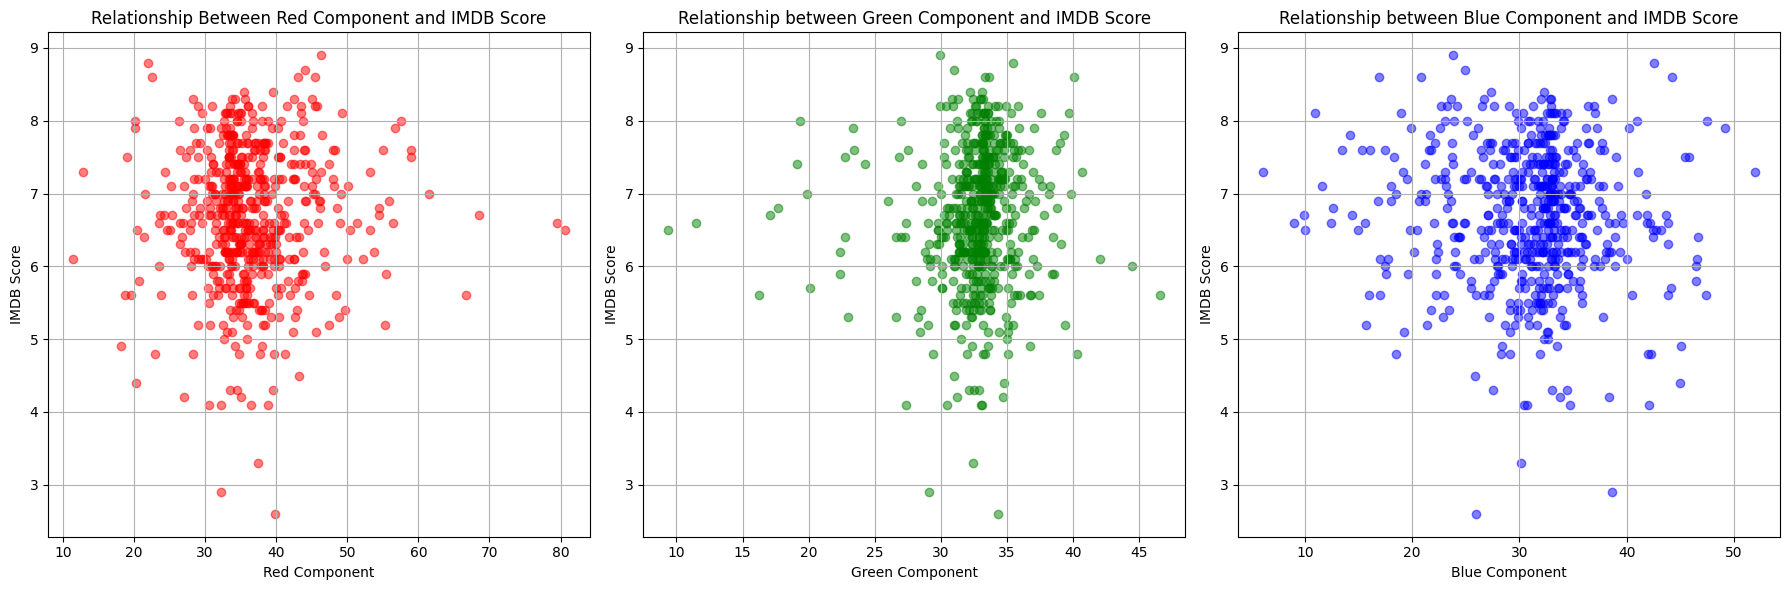

In [172]:

plt.figure(figsize=(18, 6))

# Red  scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df1_df['Red'], df1_df['IMDB Score'], color='red', alpha=0.5)
plt.title('Relationship Between Red Component and IMDB Score')
plt.xlabel('Red Component')
plt.ylabel('IMDB Score')
plt.grid(True)

# Green bileşeni için scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df1_df['Green'], df1_df['IMDB Score'], color='green', alpha=0.5)
plt.title('Relationship between Green Component and IMDB Score')
plt.xlabel('Green Component')
plt.ylabel('IMDB Score')
plt.grid(True)

# Blue bileşeni için scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df1_df['Blue'], df1_df['IMDB Score'], color='blue', alpha=0.5)
plt.title('Relationship between Blue Component and IMDB Score')
plt.xlabel('Blue Component')
plt.ylabel('IMDB Score')
plt.grid(True)

plt.tight_layout()
plt.show()

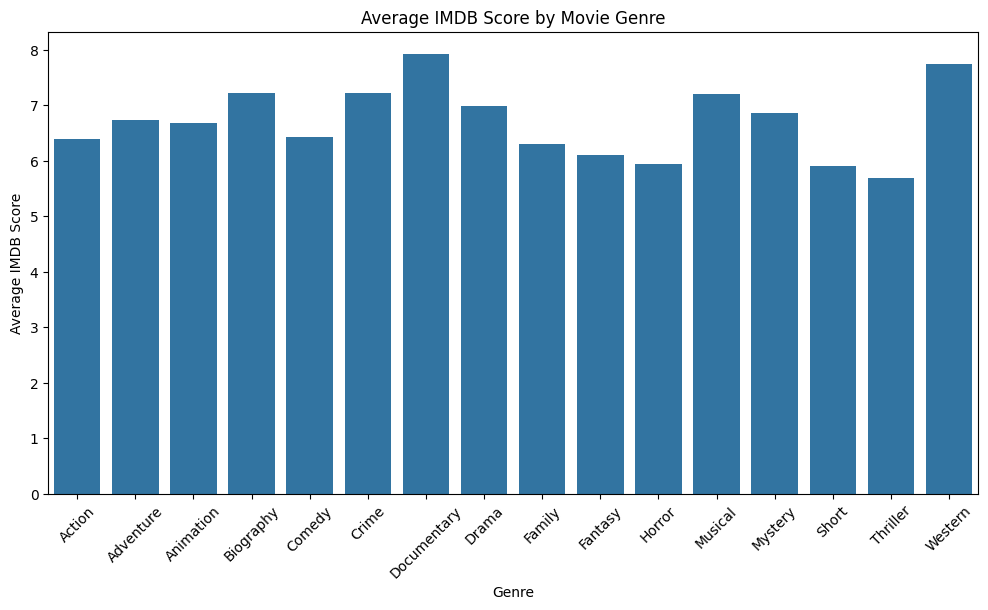

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the impact of movie genre on IMDB score as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_vs_imdb_grouped.index, y=genre_vs_imdb_grouped.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Movie Genre')
plt.show()

C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\1036538715.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB Score', y='director', data=director_avg_scores_sorted, palette='viridis')


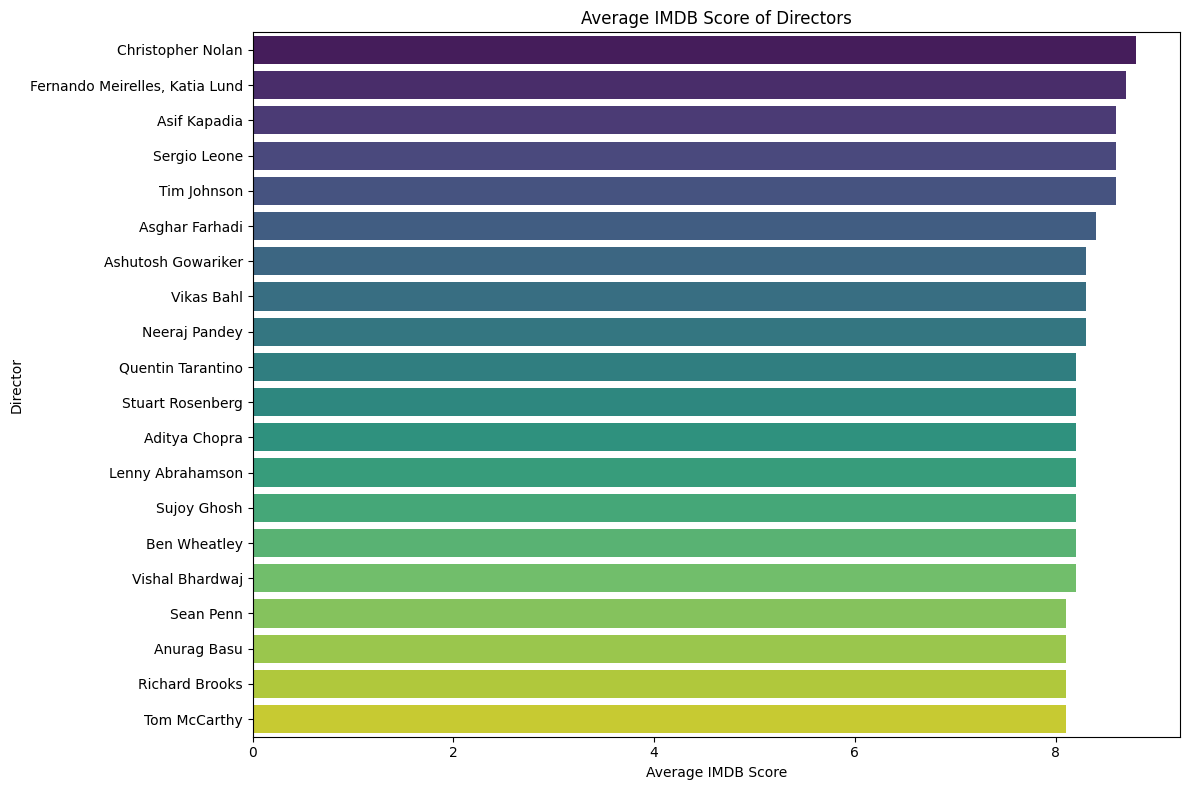

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yönetmenlerin IMDB puanı ortalamasını hesaplama
director_avg_scores = director_vs_imdb.groupby('director')['IMDB Score'].mean().reset_index()

# IMDB puanı ortalamasına göre sıralama
director_avg_scores_sorted = director_avg_scores.sort_values(by='IMDB Score', ascending=False).head(20)  # Top 20 yönetmeni seçiyoruz

# Yönetmenlerin IMDB puanı ortalamasını görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='IMDB Score', y='director', data=director_avg_scores_sorted, palette='viridis')
plt.title('Average IMDB Score of Directors')
plt.xlabel('Average IMDB Score')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


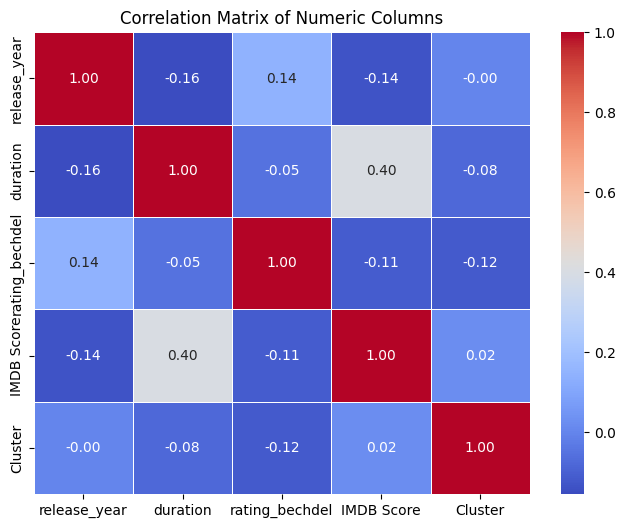

Correlation coefficients:
                release_year  duration  rating_bechdel  IMDB Score   Cluster
release_year        1.000000 -0.155905        0.144759   -0.136950 -0.001574
duration           -0.155905  1.000000       -0.052645    0.403453 -0.081950
rating_bechdel      0.144759 -0.052645        1.000000   -0.114676 -0.115738
IMDB Score         -0.136950  0.403453       -0.114676    1.000000  0.022453
Cluster            -0.001574 -0.081950       -0.115738    0.022453  1.000000


In [175]:
numeric_columns = ['release_year', 'duration', 'rating_bechdel', 'IMDB Score', 'Cluster']

# Korelasyon matrisini hesaplayalım
correlation_matrix = df1_df[numeric_columns].corr()

# Korelasyon matrisini ve ısı haritasını görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Korelasyon katsayılarını yazdıralım
print("Correlation coefficients:")
print(correlation_matrix)

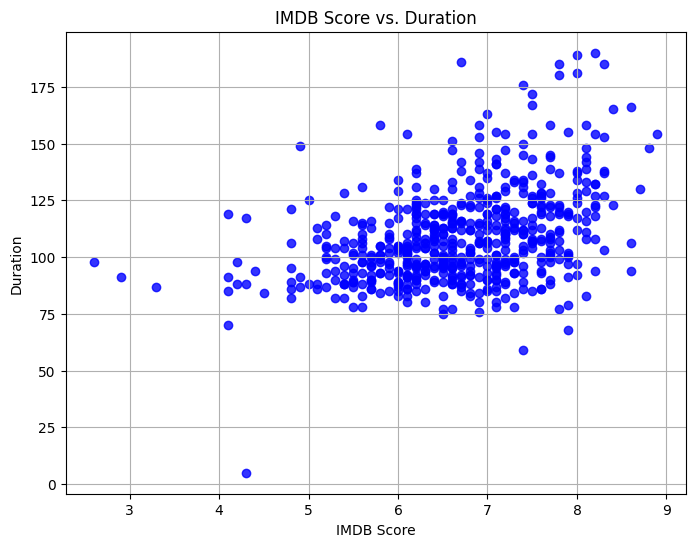

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(df1_df['IMDB Score'], df1_df['duration'], alpha=0.8, color='blue')
plt.title('IMDB Score vs. Duration')
plt.xlabel('IMDB Score')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

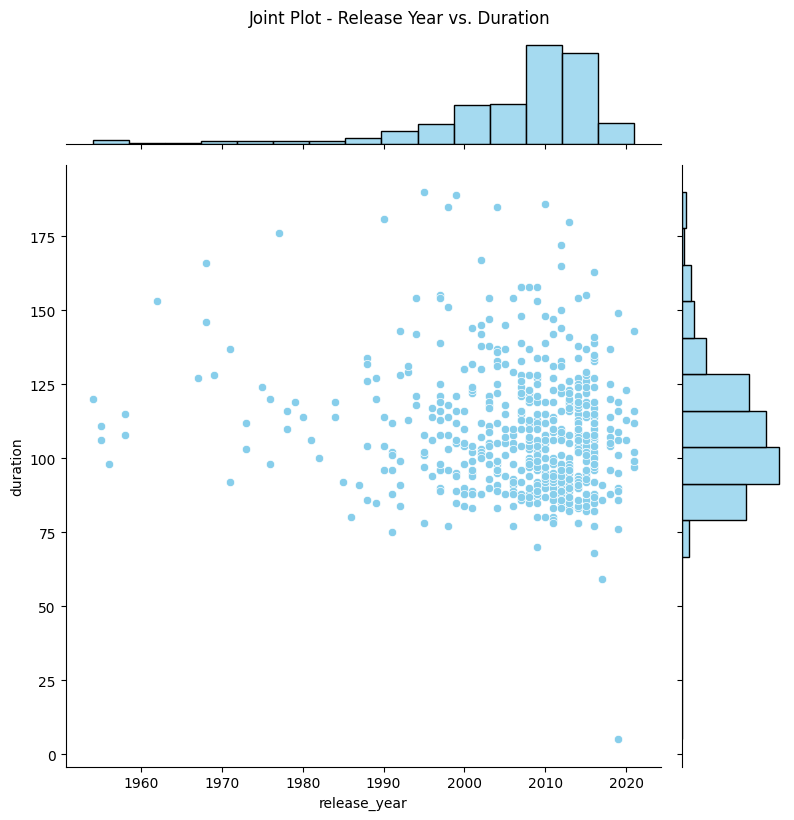

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.jointplot(x='release_year', y='duration', data=df1_df, kind='scatter', height=8, color='skyblue', marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Plot - Release Year vs. Duration', y=1.02)
plt.show() 


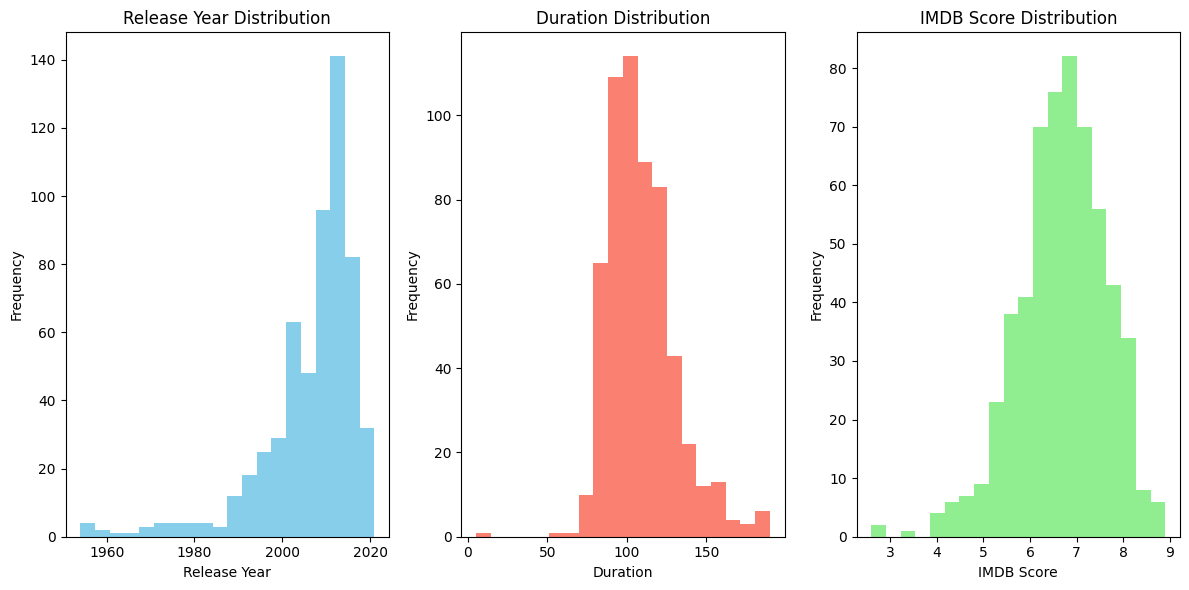

C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\3162016412.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_merged', y='IMDB Score', data=df1_df, palette='viridis')


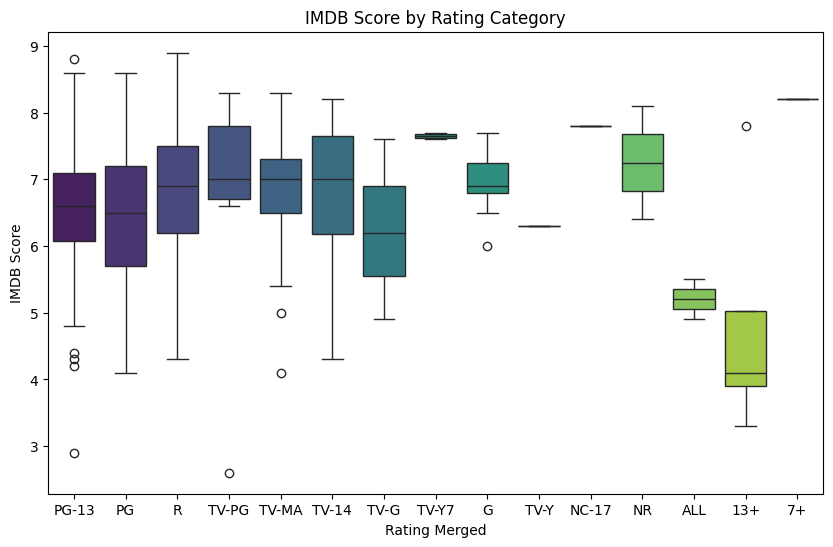

C:\Users\Canan\AppData\Local\Temp\ipykernel_25160\3162016412.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='duration', data=df1_df, palette='Set2')


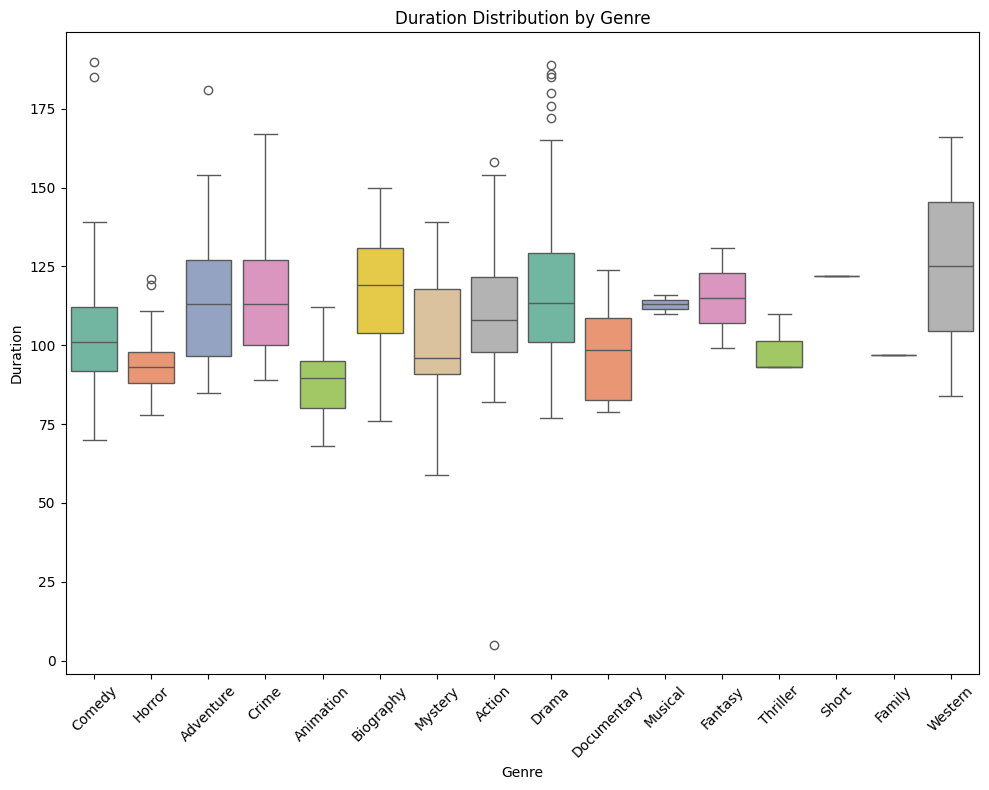

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df1_df['release_year'], bins=20, color='skyblue')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df1_df['duration'], bins=20, color='salmon')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df1_df['IMDB Score'], bins=20, color='lightgreen')
plt.title('IMDB Score Distribution')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_merged', y='IMDB Score', data=df1_df, palette='viridis')
plt.title('IMDB Score by Rating Category')
plt.xlabel('Rating Merged')
plt.ylabel('IMDB Score')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Genre', y='duration', data=df1_df, palette='Set2')
plt.title('Duration Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [179]:
from sklearn.preprocessing import OneHotEncoder


ohe_cast = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


selected_columns = ['cast1', 'cast2', 'cast3']
selected_df = df1_df[selected_columns]


ohetransform_cast = ohe_cast.fit_transform(selected_df)


ohetransform_column_names_cast = ohe_cast.get_feature_names_out(selected_columns)
ohetransform_df_cast = pd.DataFrame(ohetransform_cast, columns=ohetransform_column_names_cast)


df1_df = pd.concat([df1_df, ohetransform_df_cast], axis=1)

df1_df.drop(columns=selected_columns, inplace=True)


print(df1_df)

      type              title        country  release_year rating_merged  \
0    Movie          Grown Ups  United States        2010.0         PG-13   
1    Movie         Dark Skies  United States        2013.0         PG-13   
2    Movie               Jaws  United States        1975.0            PG   
3    Movie             Jaws 2  United States        1978.0            PG   
4    Movie  Jaws: The Revenge  United States        1987.0         PG-13   
..     ...                ...            ...           ...           ...   
548    NaN                NaN            NaN           NaN           NaN   
551    NaN                NaN            NaN           NaN           NaN   
558    NaN                NaN            NaN           NaN           NaN   
560    NaN                NaN            NaN           NaN           NaN   
569    NaN                NaN            NaN           NaN           NaN   

     duration  rating_bechdel  IMDB Score      Genre          director  ...  \
0       

In [180]:
from sklearn.preprocessing import OneHotEncoder

ohe_type = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_rating_merged = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)
ohe_Genre = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)
ohe_country = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)

ohetransform_type = ohe_type.fit_transform(df1_df[['type']])
ohetransform_rating_merged = ohe_rating_merged.fit_transform(df1_df[['rating_merged']])
ohetransform_Genre = ohe_Genre.fit_transform(df1_df[['Genre']])
ohetransform_country = ohe_country.fit_transform(df1_df[['country']])

ohetransform_column_names_type = ohe_type.get_feature_names_out(['type'])
ohetransform_column_names_rating_merged = ohe_rating_merged.get_feature_names_out(['rating_merged'])
ohetransform_column_names_Genre = ohe_Genre.get_feature_names_out(['Genre'])
ohetransform_column_names_country = ohe_country.get_feature_names_out(['country'])

ohetransform_df_type = pd.DataFrame(ohetransform_type, columns=ohetransform_column_names_type)
ohetransform_df_rating_merged = pd.DataFrame(ohetransform_rating_merged, columns=ohetransform_column_names_rating_merged)
ohetransform_df_Genre = pd.DataFrame(ohetransform_Genre, columns=ohetransform_column_names_Genre)
ohetransform_df_country = pd.DataFrame(ohetransform_country, columns=ohetransform_column_names_country)

In [181]:
encoded_df = pd.concat([df1_df,ohetransform_df_type, ohetransform_df_rating_merged, ohetransform_df_Genre, ohetransform_df_country], axis=1).drop(columns=['type',  'rating_merged', 'Genre','country'])
encoded_df

title  release_year  duration  rating_bechdel  IMDB Score  \
0            Grown Ups        2010.0     103.0             3.0         6.0   
1           Dark Skies        2013.0      97.0             2.0         6.3   
2                 Jaws        1975.0     124.0             3.0         8.0   
3               Jaws 2        1978.0     116.0             2.0         5.7   
4    Jaws: The Revenge        1987.0      91.0             3.0         2.9   
..                 ...           ...       ...             ...         ...   
560                NaN           NaN       NaN             NaN         NaN   
569                NaN           NaN       NaN             NaN         NaN   
578                NaN           NaN       NaN             NaN         NaN   
586                NaN           NaN       NaN             NaN         NaN   
618                NaN           NaN       NaN             NaN         NaN   

             director        Red      Green       Blue  Cluster  ...  \
0        Dennis Dugan  30.387512  33.864236  35.748252      1.0  ...   
1       Scott Stewart  34.951252  32.810361  32.238387      4.0  ...   
2    Steven Spielberg  26.382578  32.653589  40.963833      5.0  ...   
3      Jeannot Szwarc  31.946345  32.453986  35.599668      5.0  ...   
4      Joseph Sargent  32.252648  29.110029  38.637323      1.0  ...   
..                ...        ...        ...        ...      ...  ...   
560               NaN        NaN        NaN        NaN      NaN  ...   
569               NaN        NaN        NaN        NaN      NaN  ...   
578               NaN        NaN        NaN        NaN      NaN  ...   
586               NaN        NaN        NaN        NaN      NaN  ...   
618               NaN        NaN        NaN        NaN      NaN  ...   

     country_Saudi Arabia  country_South Africa  country_South Korea  \
0                     0.0                   0.0                  0.0   
1                     0.0                   0.0                  0.0   
2                     0.0                   0.0                  0.0   
3                     0.0                   0.0                  0.0   
4                     0.0                   0.0                  0.0   
..                    ...                   ...                  ...   
560                   0.0                   0.0                  0.0   
569                   0.0                   0.0                  0.0   
578                   0.0                   0.0                  0.0   
586                   0.0                   0.0                  0.0   
618                   0.0                   0.0                  0.0   

     country_Spain  country_Switzerland  country_Thailand  \
0              0.0                  0.0               0.0   
1              0.0                  0.0               0.0   
2              0.0                  0.0               0.0   
3              0.0                  0.0               0.0   
4              0.0                  0.0               0.0   
..             ...                  ...               ...   
560            0.0                  0.0               0.0   
569            0.0                  0.0               0.0   
578            0.0                  0.0               0.0   
586            0.0                  0.0               0.0   
618            0.0                  0.0               0.0   

     country_United Arab Emirates  country_United Kingdom  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             0.0                     0.0   
..                            ...                     ...   
560                           0.0                     0.0   
569                           0.0                     0.0   
578                           0.0                     0.0   
586    

In [182]:
encoded_dropped_df=encoded_df.dropna()
last_df=encoded_dropped_df.reset_index(drop=True)
last_df

title  release_year  duration  \
0                                         Grown Ups        2010.0     103.0   
1                                        Dark Skies        2013.0      97.0   
2                                              Jaws        1975.0     124.0   
3                                            Jaws 2        1978.0     116.0   
4                                 Jaws: The Revenge        1987.0      91.0   
..                                              ...           ...       ...   
503                                      Striptease        1996.0     117.0   
504                                        Superbad        2007.0     113.0   
505                                Superman Returns        2006.0     154.0   
506  Sweeney Todd: The Demon Barber of Fleet Street        2007.0     116.0   
507                                  Swiss Army Man        2016.0      97.0   

     rating_bechdel  IMDB Score                    director        Red  \
0               3.0         6.0                Dennis Dugan  30.387512   
1               2.0         6.3               Scott Stewart  34.951252   
2               3.0         8.0            Steven Spielberg  26.382578   
3               2.0         5.7              Jeannot Szwarc  31.946345   
4               3.0         2.9              Joseph Sargent  32.252648   
..              ...         ...                         ...        ...   
503             3.0         4.3              Andrew Bergman  39.560717   
504             3.0         7.6                Greg Mottola  36.978328   
505             1.0         6.1                Bryan Singer   29.71648   
506             1.0         7.4                  Tim Burton  43.297282   
507             2.0         7.1  Dan Kwan, Daniel Scheinert  27.060826   

         Green       Blue  Cluster  ...  country_Saudi Arabia  \
0    33.864236  35.748252      1.0  ...                   0.0   
1    32.810361  32.238387      4.0  ...                   0.0   
2    32.653589  40.963833      5.0  ...                   0.0   
3    32.453986  35.599668      5.0  ...                   0.0   
4    29.110029  38.637323      1.0  ...                   0.0   
..         ...        ...      ...  ...                   ...   
503  32.889435  27.549848      2.0  ...                   0.0   
504  32.601013  30.420658      2.0  ...                   0.0   
505  32.339889  37.943631      1.0  ...                   0.0   
506  28.540281  28.162437      3.0  ...                   0.0   
507  35.485761  37.453413      1.0  ...                   0.0   

     country_South Africa  country_South Korea  country_Spain  \
0                     0.0                  0.0            0.0   
1                     0.0                  0.0            0.0   
2                     0.0                  0.0            0.0   
3                     0.0                  0.0            0.0   
4                     0.0                  0.0            0.0   
..                    ...                  ...            ...   
503                   0.0                  0.0            0.0   
504                   0.0                  0.0            0.0   
505                   0.0                  0.0            0.0   
506                   0.0                  0.0            0.0   
507                   0.0                  0.0            0.0   

     country_Switzerland  country_Thailand  country_United Arab Emirates  \
0                    0.0               0.0                           0.0   
1                    0.0               0.0                           0.0   
2                    0.0               0.0                           0.0   
3                    0.0               0.0                           0.0   
4                    0.0               0.0                           0.0   
..                   ...               ...                           ...   
503                  0.0               0.0                           0.0   
504                  0.0              

In [183]:
last_df.describe

<bound method NDFrame.describe of                                               title  release_year  duration  \
0                                         Grown Ups        2010.0     103.0   
1                                        Dark Skies        2013.0      97.0   
2                                              Jaws        1975.0     124.0   
3                                            Jaws 2        1978.0     116.0   
4                                 Jaws: The Revenge        1987.0      91.0   
..                                              ...           ...       ...   
503                                      Striptease        1996.0     117.0   
504                                        Superbad        2007.0     113.0   
505                                Superman Returns        2006.0     154.0   
506  Sweeney Todd: The Demon Barber of Fleet Street        2007.0     116.0   
507                                  Swiss Army Man        2016.0      97.0   

     rating_bechd

In [184]:
last_df.columns

Index(['title', 'release_year', 'duration', 'rating_bechdel', 'IMDB Score',
       'director', 'Red', 'Green', 'Blue', 'Cluster',
       ...
       'country_Saudi Arabia', 'country_South Africa', 'country_South Korea',
       'country_Spain', 'country_Switzerland', 'country_Thailand',
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_nan'],
      dtype='object', length=1526)

In [185]:
last_df['director']

0                    Dennis Dugan
1                   Scott Stewart
2                Steven Spielberg
3                  Jeannot Szwarc
4                  Joseph Sargent
                  ...            
503                Andrew Bergman
504                  Greg Mottola
505                  Bryan Singer
506                    Tim Burton
507    Dan Kwan, Daniel Scheinert
Name: director, Length: 508, dtype: object

In [186]:
last_df['director'].nunique()

427

In [187]:
last_df['director'].value_counts()

director
Steven Spielberg              6
Quentin Tarantino             6
Clint Eastwood                5
Martin Scorsese               4
Peter Segal                   3
                             ..
Danny Boyle                   1
Numa Perrier                  1
Tim Hill                      1
Angelina Jolie                1
Dan Kwan, Daniel Scheinert    1
Name: count, Length: 427, dtype: int64

In [188]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
last_df['director']= label_encoder.fit_transform(last_df['director'])

In [189]:
last_df['director'].dtypes

dtype('int32')

In [190]:
last_df.shape

(508, 1526)

In [191]:
num_columns = last_df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 1526


In [192]:
desired_order = ['title', 'release_year', 'duration', 'rating_bechdel', 'type', 'rating', 'IMDB Score', 'Red', 'Green', 'Blue','Cluster','genre', 'cast', 'country','director']
sorted_columns = []
for prefix in desired_order:
    columns_with_prefix = [col for col in last_df.columns if col.startswith(prefix)]
    sorted_columns.extend(columns_with_prefix)
srtd_df = last_df[sorted_columns]

In [193]:
srtd_df.describe

<bound method NDFrame.describe of                                               title  release_year  duration  \
0                                         Grown Ups        2010.0     103.0   
1                                        Dark Skies        2013.0      97.0   
2                                              Jaws        1975.0     124.0   
3                                            Jaws 2        1978.0     116.0   
4                                 Jaws: The Revenge        1987.0      91.0   
..                                              ...           ...       ...   
503                                      Striptease        1996.0     117.0   
504                                        Superbad        2007.0     113.0   
505                                Superman Returns        2006.0     154.0   
506  Sweeney Todd: The Demon Barber of Fleet Street        2007.0     116.0   
507                                  Swiss Army Man        2016.0      97.0   

     rating_bechd

In [194]:
ohe_cluster = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohetransform_cluster = ohe_cluster.fit_transform(srtd_df[['Cluster']])
ohetransform_column_names_cluster = ohe_cluster.get_feature_names_out(['Cluster'])
ohetransform_df_cluster = pd.DataFrame(ohetransform_cluster, columns=ohetransform_column_names_cluster)


df_encoded = pd.concat([srtd_df,ohetransform_df_cluster], axis=1).drop(columns=['Cluster'])
df_encoded

title  release_year  duration  \
0                                         Grown Ups        2010.0     103.0   
1                                        Dark Skies        2013.0      97.0   
2                                              Jaws        1975.0     124.0   
3                                            Jaws 2        1978.0     116.0   
4                                 Jaws: The Revenge        1987.0      91.0   
..                                              ...           ...       ...   
503                                      Striptease        1996.0     117.0   
504                                        Superbad        2007.0     113.0   
505                                Superman Returns        2006.0     154.0   
506  Sweeney Todd: The Demon Barber of Fleet Street        2007.0     116.0   
507                                  Swiss Army Man        2016.0      97.0   

     rating_bechdel  type_Movie  type_TV Show  type_nan  rating_bechdel  \
0               3.0         1.0           0.0       0.0             3.0   
1               2.0         1.0           0.0       0.0             2.0   
2               3.0         1.0           0.0       0.0             3.0   
3               2.0         1.0           0.0       0.0             2.0   
4               3.0         1.0           0.0       0.0             3.0   
..              ...         ...           ...       ...             ...   
503             3.0         1.0           0.0       0.0             3.0   
504             3.0         1.0           0.0       0.0             3.0   
505             1.0         1.0           0.0       0.0             1.0   
506             1.0         1.0           0.0       0.0             1.0   
507             2.0         1.0           0.0       0.0             2.0   

     rating_merged_13+  rating_merged_7+  ...  country_United Kingdom  \
0                  0.0               0.0  ...                     0.0   
1                  0.0               0.0  ...                     0.0   
2                  0.0               0.0  ...                     0.0   
3                  0.0               0.0  ...                     0.0   
4                  0.0               0.0  ...                     0.0   
..                 ...               ...  ...                     ...   
503                0.0               0.0  ...                     0.0   
504                0.0               0.0  ...                     0.0   
505                0.0               0.0  ...                     0.0   
506                0.0               0.0  ...                     0.0   
507                0.0               0.0  ...                     0.0   

     country_United States  country_nan  director  Cluster_1.0  Cluster_2.0  \
0                      1.0          0.0       100          1.0          0.0   
1                      1.0          0.0       353          0.0          0.0   
2                      1.0          0.0       384          0.0          0.0   
3                      1.0          0.0       172          0.0          0.0   
4                      1.0          0.0       205          1.0          0.0   
..                     ...          ...       ...          ...          ...   
503                    1.0          0.0        17          0.0          1.0   
504                    1.0          0.0       139          0.0          1.0   
505                    1.0          0.0        52          1.0          0.0   
506                    1.0          0.0       399          0.0          0.0   
507                    1.0          0.0        81          1.0          0.0   

     Cluster_3.0  Cluster_4.0  Cluster_5.0  Cluster_6.0  
0            0.0          0.0          0.0          0.0  
1            0.0          1.0          0.0          0.0  
2            0.0          0.0          1.0          0.0  
3            0.0          0.0          1.0          0.0  
4            0.0          0.0          0.0          0.0  
..           ...      

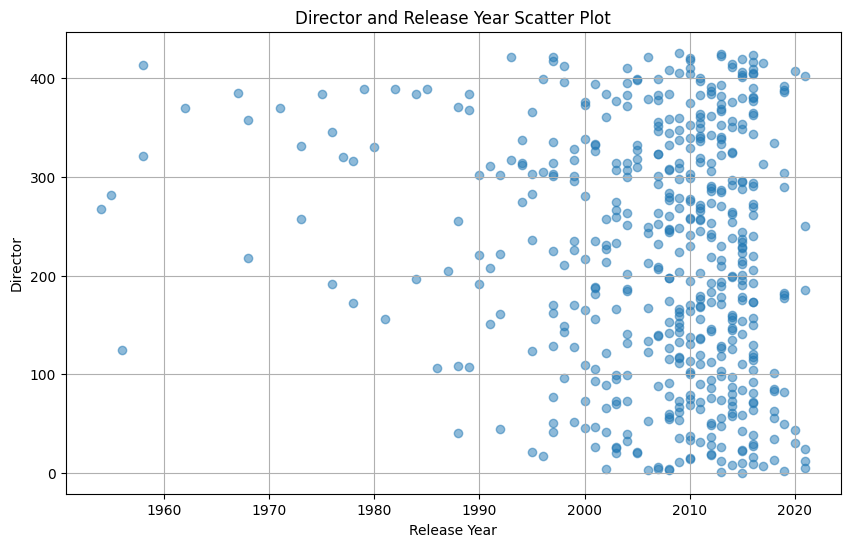

In [195]:
import matplotlib.pyplot as plt

# Scatter plot çizimi
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['release_year'], df_encoded['director'], alpha=0.5)
plt.title('Director and Release Year Scatter Plot')
plt.xlabel('Release Year')
plt.ylabel('Director')
plt.grid(True)
plt.show()


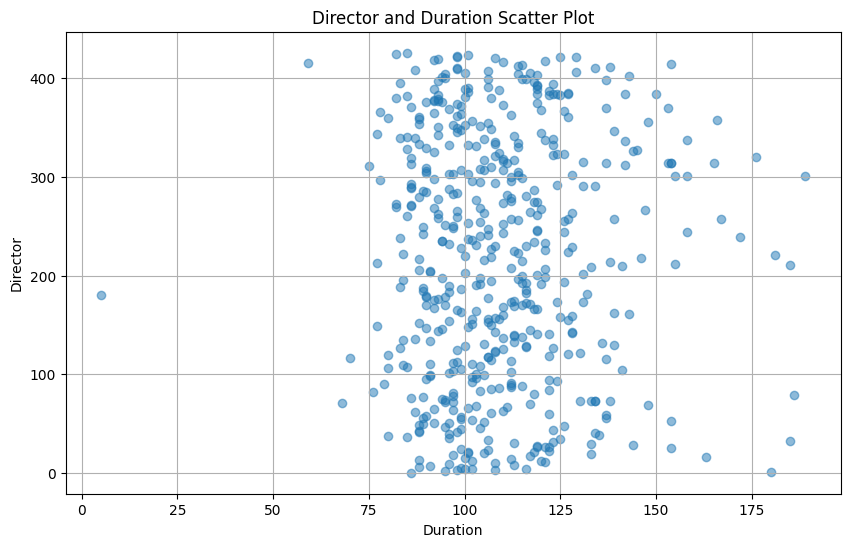

In [196]:
import matplotlib.pyplot as plt

# Scatter plot çizimi
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['duration'], df_encoded['director'], alpha=0.5)
plt.title('Director and Duration Scatter Plot')
plt.xlabel('Duration')
plt.ylabel('Director')
plt.grid(True)
plt.show()

In [197]:
value_counts = df_encoded['director'].value_counts()

print("Counts of unique values:")
print(value_counts)

Counts of unique values:
director
384    6
314    6
73     5
257    4
307    3
      ..
84     1
290    1
400    1
22     1
81     1
Name: count, Length: 427, dtype: int64


In [198]:
def map_to_class(count):
    if count in [1, 2]:
        return 1
    elif count in [3, 4]:
        return 2
    elif count in [5, 6]:
        return 3
    else:
        return None

df_encoded['Director Class'] = df_encoded['director'].map(value_counts).apply(map_to_class)

print("\nDataFrame with classes:")
print(df_encoded)


DataFrame with classes:
                                              title  release_year  duration  \
0                                         Grown Ups        2010.0     103.0   
1                                        Dark Skies        2013.0      97.0   
2                                              Jaws        1975.0     124.0   
3                                            Jaws 2        1978.0     116.0   
4                                 Jaws: The Revenge        1987.0      91.0   
..                                              ...           ...       ...   
503                                      Striptease        1996.0     117.0   
504                                        Superbad        2007.0     113.0   
505                                Superman Returns        2006.0     154.0   
506  Sweeney Todd: The Demon Barber of Fleet Street        2007.0     116.0   
507                                  Swiss Army Man        2016.0      97.0   

     rating_bechdel  type_

In [199]:
clt_ohe = df_encoded.drop('director', axis=1)

label_encoder = LabelEncoder()
clt_ohe['Director Class'] = label_encoder.fit_transform(clt_ohe['Director Class'])

In [200]:
clt_ohe.describe()

release_year    duration  rating_bechdel  type_Movie  type_TV Show  \
count    508.000000  508.000000      508.000000  508.000000    508.000000   
mean    2006.759843  109.405512        2.129921    0.998031      0.001969   
std       10.819726   20.913764        1.056048    0.044368      0.044368   
min     1954.000000    5.000000        0.000000    0.000000      0.000000   
25%     2003.000000   95.000000        1.000000    1.000000      0.000000   
50%     2010.000000  106.000000        3.000000    1.000000      0.000000   
75%     2014.000000  120.000000        3.000000    1.000000      0.000000   
max     2021.000000  189.000000        3.000000    1.000000      1.000000   

       type_nan  rating_bechdel  rating_merged_13+  rating_merged_7+  \
count     508.0      508.000000         508.000000        508.000000   
mean        0.0        2.129921           0.005906          0.001969   
std         0.0        1.056048           0.076696          0.044368   
min         0.0        0.000000           0.000000          0.000000   
25%         0.0        1.000000           0.000000          0.000000   
50%         0.0        3.000000           0.000000          0.000000   
75%         0.0        3.000000           0.000000          0.000000   
max         0.0        3.000000           1.000000          1.000000   

       rating_merged_ALL  ...  country_United Kingdom  country_United States  \
count         508.000000  ...              508.000000             508.000000   
mean            0.003937  ...                0.116142               0.696850   
std             0.062684  ...                0.320711               0.460072   
min             0.000000  ...                0.000000               0.000000   
25%             0.000000  ...                0.000000               0.000000   
50%             0.000000  ...                0.000000               1.000000   
75%             0.000000  ...                0.000000               1.000000   
max             1.000000  ...                1.000000               1.000000   

       country_nan  Cluster_1.0  Cluster_2.0  Cluster_3.0  Cluster_4.0  \
count        508.0   508.000000   508.000000   508.000000   508.000000   
mean           0.0     0.124016     0.179134     0.179134     0.255906   
std            0.0     0.329924     0.383842     0.383842     0.436799   
min            0.0     0.000000     0.000000     0.000000     0.000000   
25%            0.0     0.000000     0.000000     0.000000     0.000000   
50%            0.0     0.000000     0.000000     0.000000     0.000000   
75%            0.0     0.000000     0.000000     0.000000     1.000000   
max            0.0     1.000000     1.000000     1.000000     1.000000   

       Cluster_5.0  Cluster_6.0  Director Class  
count   508.000000   508.000000      508.000000  
mean      0.096457     0.165354        0.151575  
std       0.295508     0.371866        0.442622  
min       0.000000     0.000000        0.000000  
25%       0.000000     0.000000        0.000000  
50%       0.000000     0.000000        0.000000  
75%       0.000000     0.000000        0.000000  
max       1.000000     1.000000        2.000000  

[8 rows x 1511 columns]

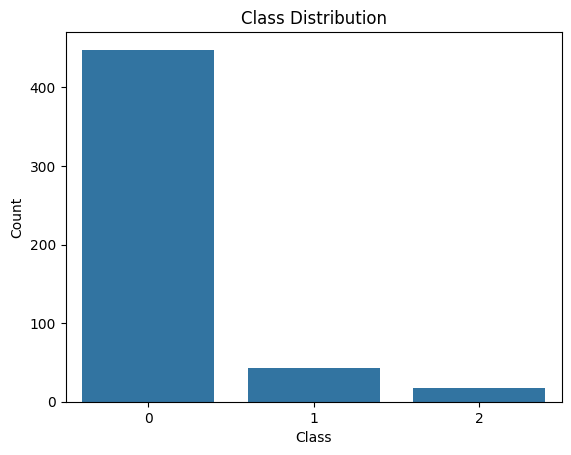

In [201]:
sns.countplot(x='Director Class', data=clt_ohe)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [202]:
clt_ohe.drop(columns=['title'], inplace=True)

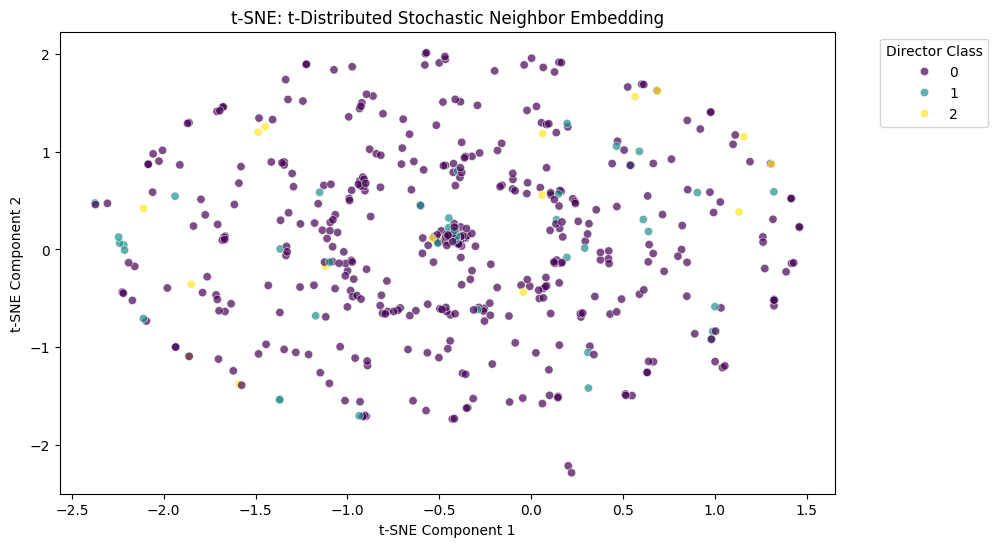

In [203]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


X = clt_ohe.drop('Director Class', axis=1)
y = clt_ohe['Director Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Director'] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Director', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE: t-Distributed Stochastic Neighbor Embedding')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Director Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Model Training ###

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [205]:
X = clt_ohe.drop('Director Class', axis=1)
y = clt_ohe['Director Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [206]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
C_values = [0.1, 0.5, 1]
class_weights = [None, 'balanced']  

best_mean = 0
best_mean_params = {}

for C in C_values:
    for w in class_weights:
        
        classifier_trial = LogisticRegression(C=C, class_weight=w, random_state=42)
        scores = cross_val_score(classifier_trial, X_train_scaled, y_train, cv=5)
        print(f'Logistic Regression: C = {C}, Class Weight = {w}, 5-fold scores = {scores}, mean = {round(scores.mean(),4)}')
        if scores.mean() > best_mean:
            best_mean = scores.mean()
            best_mean_params = {'C': C, 'Class Weight': w}

print(f'Best Mean Parameters: {best_mean_params} with a mean score of {round(best_mean,4)}')

Logistic Regression: C = 0.1, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
Logistic Regression: C = 0.1, Class Weight = balanced, 5-fold scores = [0.81707317 0.80246914 0.79012346 0.74074074 0.65432099], mean = 0.7609
Logistic Regression: C = 0.5, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
Logistic Regression: C = 0.5, Class Weight = balanced, 5-fold scores = [0.82926829 0.83950617 0.85185185 0.82716049 0.86419753], mean = 0.8424
Logistic Regression: C = 1, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
Logistic Regression: C = 1, Class Weight = balanced, 5-fold scores = [0.82926829 0.85185185 0.85185185 0.86419753 0.87654321], mean = 0.8547
Best Mean Parameters: {'C': 0.1, 'Class Weight': None} with a mean score of 0.8744


In [208]:
C_values = [0.1, 0.5, 1]
kernel_type = ['linear', 'rbf'] 
class_weights = [None, 'balanced']  

best_mean = 0
best_mean_params = {}


for C in C_values:
    for w in class_weights:
        for k in kernel_type:
            
            classifier_trial = SVC(kernel=k, C=C, class_weight=w, random_state=42)
            scores = cross_val_score(classifier_trial, X_train_scaled, y_train, cv=5)
            print(f'SVM: C = {C}, kernel = {k}, Class Weight = {w}, 5-fold scores = {scores}, mean = {round(scores.mean(),4)}')
            
            if scores.mean() > best_mean:
                best_mean = scores.mean()
                best_mean_params = {'C': C, 'Kernel':k, 'Class Weight': w}

print(f'Best Mean Parameters: {best_mean_params} with a mean score of {round(best_mean,4)}')

SVM: C = 0.1, kernel = linear, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
SVM: C = 0.1, kernel = rbf, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
SVM: C = 0.1, kernel = linear, Class Weight = balanced, 5-fold scores = [0.80487805 0.79012346 0.80246914 0.79012346 0.72839506], mean = 0.7832
SVM: C = 0.1, kernel = rbf, Class Weight = balanced, 5-fold scores = [0.86585366 0.35802469 0.19753086 0.28395062 0.33333333], mean = 0.4077
SVM: C = 0.5, kernel = linear, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.86419753 0.87654321 0.87654321], mean = 0.8719
SVM: C = 0.5, kernel = rbf, Class Weight = None, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
SVM: C = 0.5, kernel = linear, Class Weight = balanced, 5-fold scores = [0.85365854 0.87654321 0.86419753 0.88888889 0.88888889], mean = 0.8744
SVM: C = 0.5, ker

In [209]:
n_neighbors = [3, 5, 7, 9]
weight_options = ['uniform', 'distance']  

best_mean = 0
best_mean_params = {}


for n in n_neighbors:
    for w in weight_options:
        
        classifier_trial = KNeighborsClassifier(n_neighbors=n, weights=w)
        scores = cross_val_score(classifier_trial, X_train_scaled, y_train, cv=5)
        print(f'kNN: neighbors = {n}, Class Weight = {w}, 5-fold scores = {scores}, mean = {round(scores.mean(),4)}')
        
        if scores.mean() > best_mean:
            best_mean = scores.mean()
            best_mean_params = {'neighbors': n, 'Class Weight': w}

print(f'Best Mean Parameters: {best_mean_params} with a mean score of {round(best_mean,4)}')

kNN: neighbors = 3, Class Weight = uniform, 5-fold scores = [0.87804878 0.87654321 0.85185185 0.83950617 0.80246914], mean = 0.8497
kNN: neighbors = 3, Class Weight = distance, 5-fold scores = [0.87804878 0.88888889 0.85185185 0.83950617 0.79012346], mean = 0.8497
kNN: neighbors = 5, Class Weight = uniform, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.85185185], mean = 0.8695
kNN: neighbors = 5, Class Weight = distance, 5-fold scores = [0.86585366 0.87654321 0.86419753 0.87654321 0.85185185], mean = 0.867
kNN: neighbors = 7, Class Weight = uniform, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.86419753], mean = 0.8719
kNN: neighbors = 7, Class Weight = distance, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.86419753], mean = 0.8719
kNN: neighbors = 9, Class Weight = uniform, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744
kNN: neighbors = 9, Class Weight = distance, 5-fold scores = [0.86585366 0

In [210]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

n_estimators = [50, 100, 200]  
learning_rates = [0.01, 0.1, 1.0]

best_mean = 0
best_mean_params = {}

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        classifier_trial = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
        scores = cross_val_score(classifier_trial, X_train_scaled, y_train, cv=5)
        print(f'AdaBoost: n_estimators = {n_estimator}, learning_rate = {learning_rate}, 5-fold scores = {scores}, mean = {round(scores.mean(), 4)}')
        if scores.mean() > best_mean:
            best_mean = scores.mean()
            best_mean_params = {'n_estimators': n_estimator, 'learning_rate': learning_rate}

print(f'Best Mean Parameters: {best_mean_params} with a mean score of {round(best_mean, 4)}')

C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 50, learning_rate = 0.01, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 50, learning_rate = 0.1, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 50, learning_rate = 1.0, 5-fold scores = [0.3902439  0.71604938 0.81481481 0.77777778 0.55555556], mean = 0.6509


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 100, learning_rate = 0.01, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 100, learning_rate = 0.1, 5-fold scores = [0.86585366 0.87654321 0.86419753 0.87654321 0.87654321], mean = 0.8719


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 100, learning_rate = 1.0, 5-fold scores = [0.40243902 0.48148148 0.60493827 0.75308642 0.58024691], mean = 0.5644


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 200, learning_rate = 0.01, 5-fold scores = [0.86585366 0.87654321 0.87654321 0.87654321 0.87654321], mean = 0.8744


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 200, learning_rate = 0.1, 5-fold scores = [0.86585366 0.87654321 0.86419753 0.83950617 0.79012346], mean = 0.8472


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

AdaBoost: n_estimators = 200, learning_rate = 1.0, 5-fold scores = [0.51219512 0.49382716 0.64197531 0.59259259 0.51851852], mean = 0.5518
Best Mean Parameters: {'n_estimators': 50, 'learning_rate': 0.01} with a mean score of 0.8744


In [211]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

hidden_layer_sizes = [(50,), (100,), (50, 50)]
activation_functions = ['relu', 'tanh']
alphas = [0.0001, 0.001, 0.01]

best_mean = 0
best_mean_params = {}

for hidden_layer_size in hidden_layer_sizes:
    for activation in activation_functions:
        for alpha in alphas:
            
            classifier_trial = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation, alpha=alpha, random_state=42)
            scores = cross_val_score(classifier_trial, X_train_scaled, y_train, cv=5)
            print(f'Neural Network: Hidden Layers = {hidden_layer_size}, Activation = {activation}, Alpha = {alpha}, 5-fold scores = {scores}, mean = {round(scores.mean(), 4)}')

            if scores.mean() > best_mean:
                best_mean = scores.mean()
                best_mean_params = {'Hidden Layers': hidden_layer_size, 'Activation': activation, 'Alpha': alpha}

print(f'Best Mean Parameters: {best_mean_params} with a mean score of {round(best_mean, 4)}')


Neural Network: Hidden Layers = (50,), Activation = relu, Alpha = 0.0001, 5-fold scores = [0.86585366 0.85185185 0.85185185 0.90123457 0.87654321], mean = 0.8695
Neural Network: Hidden Layers = (50,), Activation = relu, Alpha = 0.001, 5-fold scores = [0.86585366 0.85185185 0.85185185 0.90123457 0.87654321], mean = 0.8695
Neural Network: Hidden Layers = (50,), Activation = relu, Alpha = 0.01, 5-fold scores = [0.86585366 0.85185185 0.85185185 0.88888889 0.87654321], mean = 0.867
Neural Network: Hidden Layers = (50,), Activation = tanh, Alpha = 0.0001, 5-fold scores = [0.86585366 0.86419753 0.85185185 0.88888889 0.87654321], mean = 0.8695
Neural Network: Hidden Layers = (50,), Activation = tanh, Alpha = 0.001, 5-fold scores = [0.86585366 0.86419753 0.85185185 0.88888889 0.87654321], mean = 0.8695
Neural Network: Hidden Layers = (50,), Activation = tanh, Alpha = 0.01, 5-fold scores = [0.86585366 0.86419753 0.86419753 0.88888889 0.87654321], mean = 0.8719
Neural Network: Hidden Layers = (10

Accuracy on test set: 0.9020
Precision on test set (macro average): 0.3036
Recall on test set (macro average): 0.3297


C:\Users\Canan\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


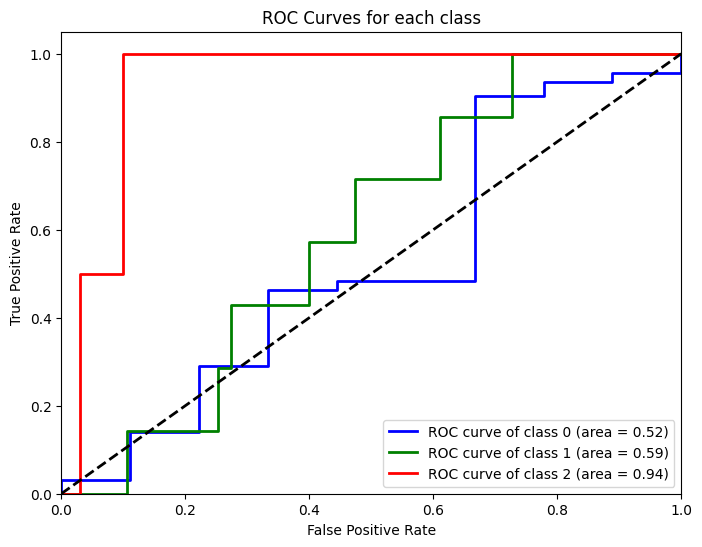

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = clt_ohe.drop('Director Class', axis=1)
y = clt_ohe['Director Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_C = 0.5
best_kernel = 'linear'
best_class_weight = None

svm_classifier = SVC(kernel=best_kernel, C=best_C, class_weight=best_class_weight, probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)
y_pred_prob = svm_classifier.predict_proba(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f'Precision on test set (macro average): {precision_macro:.4f}')
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f'Recall on test set (macro average): {recall_macro:.4f}')


num_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_binary = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_binary.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc="lower right")
plt.show()
